In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm
# id:20-20--20 

# (a)

## (i)

In [72]:
#load the dataset
file = open('/Users/xiaowei/Desktop/Year4/ML/WeeklyLab/Week2/week2.txt', 'r') 
data = np.array([line.strip().split(',') for line in file.readlines()]).astype(float)

In [54]:
# Separate the Xs and ys, and create two index lists
X = data[:, :2]
y = data[:, 2]
index1 = [i for i in range(len(y)) if y[i] == 1]
index2 = [i for i in range(len(y)) if y[i] == -1]

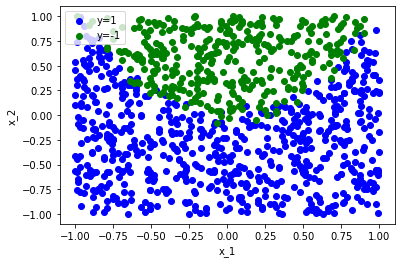

In [55]:
# Illustrate the data
plt.figure()
plt.scatter(X[index1, 0], X[index1, 1], color='blue', label='y=1')
plt.scatter(X[index2, 0], X[index2, 1], color='green', label='y=-1')
plt.legend()
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()

## (ii)

In [56]:
# Create and fit the classifier, for reproduction fix random state to 0
# Different penalty forms
clf = LogisticRegression(random_state=0, solver='saga', penalty='none').fit(X, y)
print("penalty='none'", clf.score(X, y))

clf = LogisticRegression(random_state=0, solver='saga', penalty='l1').fit(X, y)
print("penalty='l1'", clf.score(X, y))

clf = LogisticRegression(random_state=0, solver='saga', penalty='l2').fit(X, y)
print("penalty='l2'", clf.score(X, y))

clf = LogisticRegression(random_state=0, solver='saga', penalty='elasticnet', l1_ratio=0.5).fit(X, y)
print("penalty='elasticnet'(l1_ratio=0.5)", clf.score(X, y))

penalty='none' 0.8428428428428428
penalty='l1' 0.8428428428428428
penalty='l2' 0.8428428428428428
penalty='elasticnet'(l1_ratio=0.5) 0.8428428428428428


In [57]:
# Different C values
clf = LogisticRegression(random_state=0, solver='saga', C=0.1).fit(X, y)
print("C=0.1", clf.score(X, y))

clf = LogisticRegression(random_state=0, solver='saga', C=1).fit(X, y)
print("C=1", clf.score(X, y))

clf = LogisticRegression(random_state=0, solver='saga', C=10).fit(X, y)
print("C=10", clf.score(X, y))

clf = LogisticRegression(random_state=0, solver='saga', C=100).fit(X, y)
print("C=100", clf.score(X, y))

C=0.1 0.8448448448448449
C=1 0.8428428428428428
C=10 0.8428428428428428
C=100 0.8428428428428428


In [58]:
# Different max_iters
clf = LogisticRegression(random_state=0, solver='saga', max_iter=10).fit(X, y)
print("max_iter=10", clf.score(X, y))

clf = LogisticRegression(random_state=0, solver='saga', max_iter=100).fit(X, y)
print("max_iter=100", clf.score(X, y))

clf = LogisticRegression(random_state=0, solver='saga', max_iter=1000).fit(X, y)
print("max_iter=1000", clf.score(X, y))

clf = LogisticRegression(random_state=0, solver='saga', max_iter=5000).fit(X, y)
print("max_iter=5000", clf.score(X, y))

max_iter=10 0.8428428428428428
max_iter=100 0.8428428428428428
max_iter=1000 0.8428428428428428
max_iter=5000 0.8428428428428428


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## (iii)

In [59]:
clf = LogisticRegression(random_state=0, solver='saga',penalty='l2', C=1, max_iter=100).fit(X, y)
pred = clf.predict(X)
pred_index1 = [i for i in range(len(y)) if pred[i] == 1]
pred_index2 = [i for i in range(len(y)) if pred[i] == -1]

In [60]:
# Get the coefficients and obtain the decision boundary
coef = clf.coef_[0]
intercept = clf.intercept_

x1 = np.linspace(-1, 1, 10)
x2 = (-intercept-x1*coef[0])/coef[1]

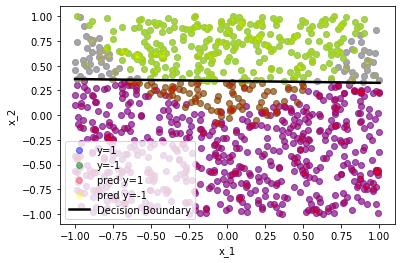

In [61]:
# Visualize the result
plt.figure()
plt.scatter(X[index1, 0], X[index1, 1], color='blue', label='y=1', alpha=0.5)
plt.scatter(X[index2, 0], X[index2, 1], color='green', label='y=-1', alpha=0.5)

plt.scatter(X[pred_index1, 0], X[pred_index1, 1], color='red', label='pred y=1', alpha=0.3)
plt.scatter(X[pred_index2, 0], X[pred_index2, 1], color='yellow', label='pred y=-1', alpha=0.3)

plt.plot(x1, x2, label='Decision Boundary', color='black', linewidth=2.5)
plt.legend()
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()

# (b)

## (i)&(ii)

In [62]:
penalties = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
accuracies = []

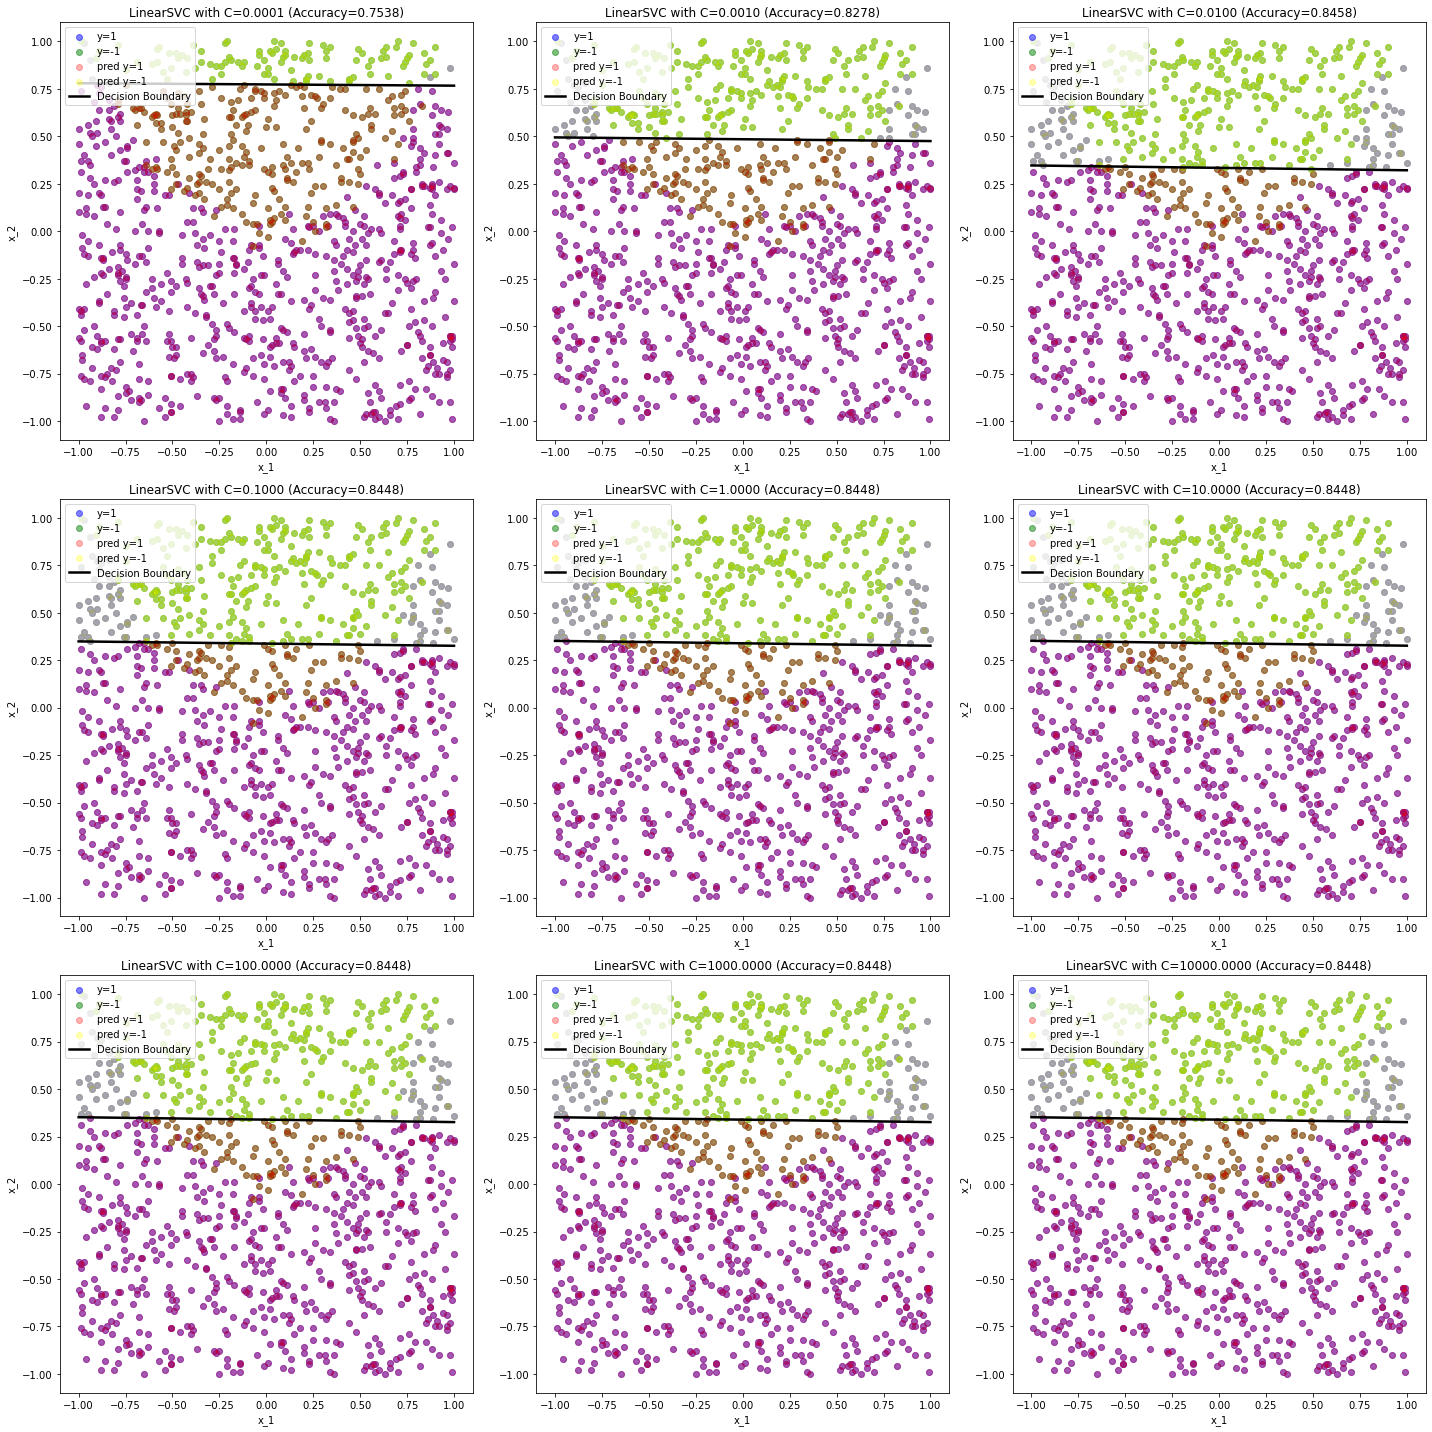

In [63]:
plt.figure(figsize=[20, 20])
for index in np.arange(len(penalties))+1:
    plt.subplot(3, 3, index)
    
    # Model construction
    clf = svm.LinearSVC(random_state=0, C=penalties[index-1],dual=False).fit(X, y)
    
    # Predict the values and also calculate the accuracy
    acc = clf.score(X, y)
    accuracies.append(acc)
    pred = clf.predict(X)
    pred_index1 = [i for i in range(len(y)) if pred[i] == 1]
    pred_index2 = [i for i in range(len(y)) if pred[i] == -1]

    # Get the coefficients and obtain the decision boundary
    coef = clf.coef_[0]
    intercept = clf.intercept_

    decision_X = np.linspace(-1, 1, 10)
    decision_y = (-intercept-decision_X*coef[0])/coef[1]
    
    plt.scatter(X[index1, 0], X[index1, 1], color='blue', label='y=1', alpha=0.5)
    plt.scatter(X[index2, 0], X[index2, 1], color='green', label='y=-1', alpha=0.5)

    plt.scatter(X[pred_index1, 0], X[pred_index1, 1], color='red', label='pred y=1', alpha=0.3)
    plt.scatter(X[pred_index2, 0], X[pred_index2, 1], color='yellow', label='pred y=-1', alpha=0.3)

    plt.plot(decision_X, decision_y, label='Decision Boundary', color='black', linewidth=2.5)
    plt.title('LinearSVC with C=%.4f (Accuracy=%.4f)'%(penalties[index-1], acc))
    plt.legend()
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    
plt.tight_layout()
plt.show()

## (iii)

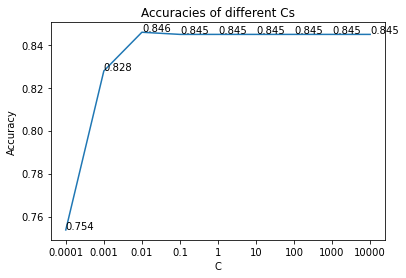

In [64]:
# Visualize the accuracy trend
plt.figure()
plt.plot(np.arange(9), accuracies)
plt.title("Accuracies of different Cs")
plt.xticks(np.arange(9), penalties)
plt.xlabel("C")
plt.ylabel("Accuracy")
for i in range(len(accuracies)):
    plt.text(i, accuracies[i]+0.0005, round(accuracies[i], 3))
plt.show()

# (c)

## (i)

In [65]:
# Add additional features
X_quad = np.concatenate(([X[:, 0]], [X[:, 1]], [X[:, 0]**2], [X[:, 1]**2])).T

In [66]:
# Fit a model
clf = LogisticRegression(random_state=0, solver='saga',penalty='l2', C=1, max_iter=100).fit(X_quad, y)
score = clf.score(X_quad, y)

In [67]:
# Print trained parameters
coef = clf.coef_[0]
intercept = clf.intercept_

print(intercept, coef)
print(score)

[0.16016973] [-0.17374868 -6.81860564  6.95519938 -0.58875719]
0.9669669669669669


## (ii)

In [68]:
pred = clf.predict(X_quad)
pred_index1 = [i for i in range(len(y)) if pred[i] == 1]
pred_index2 = [i for i in range(len(y)) if pred[i] == -1]

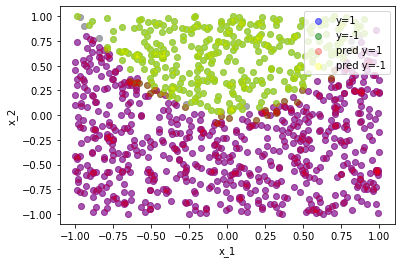

In [69]:
# Visualize the result
plt.figure()
plt.scatter(X[index1, 0], X[index1, 1], color='blue', label='y=1', alpha=0.5)
plt.scatter(X[index2, 0], X[index2, 1], color='green', label='y=-1', alpha=0.5)

plt.scatter(X[pred_index1, 0], X[pred_index1, 1], color='red', label='pred y=1', alpha=0.3)
plt.scatter(X[pred_index2, 0], X[pred_index2, 1], color='yellow', label='pred y=-1', alpha=0.3)

plt.legend()
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()